# Análise de Sentimentos
Nesta etapa será realizada análise de sentimentos dos tweets. Serão realizadas as seguintes ações:
    1. Carga do dicionário Lexico SentiLex
    2. Classificação da polaridade através do dicionario identificado
    3. Comparação da classificação automática com a classificação manual realizada na etapa anterior
    4. Análise dos erros
    5. Revisão do dicionário
    6. Nova Comparação e análise

In [336]:
import pandas as pd
import unidecode
import nltk
from nltk.stem import RSLPStemmer
import seaborn as sn
from sklearn.metrics import classification_report

In [354]:
#carrega o dicionario
def carrega_dicionario():
    sentilexLem = open("SentiLex-lem-PT02.txt", 'r')
    sentilexFlex = open("SentiLex-flex-PT02.txt", 'r')

    #gera a lista com as palavras lem
    for i in sentilexLem.readlines(): 
        pos_ponto = i.find('.')
        palavra = (i[:pos_ponto])
        palavra = palavra.lower()
        palavra = palavra.replace('[^\w\s]','')
        palavra = unidecode.unidecode(palavra)    
        pol_pos = i.find('POL')
        polaridade = (i[pol_pos+7:pol_pos+9]).replace(';','')
        if int(polaridade) == 0:
            palavras_neutras.append(palavra)
        elif int(polaridade) == 1:
            palavras_positivas.append(palavra)
        elif int(polaridade) == -1:
            palavras_negativas.append(palavra)

    #gera a lista com as palavras flex
    for i in sentilexFlex.readlines(): 
        pos_ponto = i.find('.')
        palavra = (i[:pos_ponto])
        #aplicando os mesmos tratamentos nas palavras
        palavra = palavra.lower()
        palavra = palavra.replace('[^\w\s]','')
        palavra = unidecode.unidecode(palavra)
        pol_pos = i.find('POL')
        polaridade = (i[pol_pos+7:pol_pos+9]).replace(';','')
        if int(polaridade) == 0:
            palavras_neutras.append(palavra)
        elif int(polaridade) == 1:
            palavras_positivas.append(palavra)
        elif int(polaridade) == -1:
            palavras_negativas.append(palavra)

In [355]:
#função que conta sentimentos

def sentiment(words, pos_list, neg_list):
    sent = 0
    
    for word in words:
        if word in pos_list:
            sent += 1
        elif word in neg_list:
            sent -= 1
    
    return sent

In [357]:
#lista as palavras positivas emcontradas

def sentiment_positive(words, pos_list, neg_list):
    sent = []
    
    for word in words:
        if word in pos_list:
            sent.append(word)
    
    return sent

In [358]:
#lista as palavras negativas encontradas

def sentiment_negative(words, pos_list, neg_list):
    sent = []
    
    for word in words:
        if word in neg_list:
            sent.append(word)
    
    return sent

In [359]:
def calcula_acuracia():
    colunas = ["valor_sentimento_real", "valor_sentimento_previsto"]
    df_mc = pd.DataFrame(columns = colunas)
    
    #gerando array REAL
    for index,row in df.iterrows():
        if row['NEUTRO'] == 1:
            df_mc.at[index,'valor_sentimento_real'] = 0
        elif row['POSITIVO'] == 1:
            df_mc.at[index,'valor_sentimento_real'] = 1
        elif row['NEGATIVO'] == 1:
            df_mc.at[index,'valor_sentimento_real'] = -1

    #gerando array PREVISTO
    for index,row in df.iterrows():
        if row['valor_sentimento'] == 0:
            df_mc.at[index,'valor_sentimento_previsto'] = 0
        elif row['valor_sentimento'] > 0:
            df_mc.at[index,'valor_sentimento_previsto'] = 1
        elif row['valor_sentimento'] < 0:
            df_mc.at[index,'valor_sentimento_previsto'] = -1

    #gerando a matriz de confusão
    confusion_matrix = pd.crosstab(df_mc['valor_sentimento_real'], df_mc['valor_sentimento_previsto'], rownames=['REAL'], colnames=['PREVISTO'])
    print (confusion_matrix)
    sn.heatmap(confusion_matrix)
    plt.show()
    
    #gerando relatorio
    valor_sentimento_previsto = df_mc.valor_sentimento_previsto.tolist()
    valor_sentimento_real = df_mc.valor_sentimento_real.tolist()
    print(classification_report(valor_sentimento_real, valor_sentimento_previsto, target_names=['NEGATIVO','NEUTRO','POSITIVO']))

In [360]:
# analisando sentimentos
def analisa_sentimento():
    df['valor_sentimento'] = df.text_tratado.apply(sentiment,args=(palavras_positivas, palavras_negativas))
    df['palavras_negativas'] = df.text_tratado.apply(sentiment_negative,args=(palavras_positivas, palavras_negativas))
    df['palavras_positivas'] = df.text_tratado.apply(sentiment_positive,args=(palavras_positivas, palavras_negativas))

In [371]:
#carregando os tweets
df = pd.read_pickle('dados_twitter_ans_classificados_tratados.pkl')
#definidno variáveis
palavras_negativas = []
palavras_positivas = []
palavras_neutras = []

In [372]:
carrega_dicionario()
#conta as listas
print("Palavras negativas: "+str(len(palavras_negativas)))
print("Palavras positivas: "+str(len(palavras_positivas)))
print("Palavras neutras: "+str(len(palavras_neutras)))
palavras_negativas

Palavras negativas: 58573
Palavras positivas: 22211
Palavras neutras: 8564


['abafado',
 'abafante',
 'abaixado',
 'abalado',
 'abalroado',
 'abandalhado',
 'abandalhamento',
 'abandonado',
 'abandonar',
 'abarrotado',
 'abatido',
 'abelhudo',
 'aberracao',
 'aberrante',
 'aberrativo',
 'abespinhado',
 'abestalhado',
 'abilolado',
 'abjecao',
 'abjeccao',
 'abjecto',
 'abjeto',
 'abobado',
 'abobalhado',
 'abolido',
 'abominador',
 'abominando',
 'abominavel',
 'aborrecer-se',
 'aborrecido',
 'abortado',
 'abrupto',
 'abrutalhado',
 'absentista',
 'abstracto',
 'abstraido',
 'abstrato',
 'abstrusidade',
 'abstruso',
 'absurdo',
 'abulia',
 'abulico',
 'abusado',
 'abusador',
 'abusar',
 'abusivo',
 'acabado',
 'acabadote',
 'acabrunhado',
 'acaciano',
 'acambarcador',
 'acanhado',
 'acanhamento',
 'acanhar-se',
 'acefalo',
 'acerado',
 'acerbidade',
 'acerbo',
 'acerrimo',
 'achacado',
 'achatado',
 'achincalhar',
 'acidentado',
 'aciganado',
 'acintoso',
 'acirrado',
 'acobardado',
 'acobardar-se',
 'acobertado',
 'acocado',
 'acoitado',
 'acomodadico',
 'aco

In [373]:
#analisa o sentimento
analisa_sentimento()
df[['valor_sentimento','palavras_negativas','palavras_positivas','NEGATIVO','POSITIVO','NEUTRO']]

,valor_sentimento,palavras_negativas,palavras_positivas,NEGATIVO,POSITIVO,NEUTRO
0,1,[],[imparcial],0,1,0
2,-1,[decepcao],[],1,0,0
3,2,[],"[certo, certo]",1,0,0
6,0,[],[],1,0,0
7,-1,[morte],[],1,0,0
8,0,[],[],1,0,0
9,0,[],[],0,0,1
11,-1,[triste],[],1,0,0
12,0,[],[],1,0,0
23,-2,"[nojo, asqueroso]",[],1,0,0


PREVISTO  -1    0   1
REAL                 
-1        60  90   20
 0        19  196  44
 1        2   11   9 


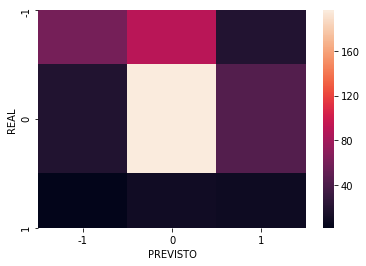

              precision    recall  f1-score   support

    NEGATIVO       0.74      0.35      0.48       170
      NEUTRO       0.66      0.76      0.71       259
    POSITIVO       0.12      0.41      0.19        22

    accuracy                           0.59       451
   macro avg       0.51      0.51      0.46       451
weighted avg       0.66      0.59      0.59       451



In [374]:
#calcula acuracia e extrai para o excel para realização de análise
calcula_acuracia()
df.to_excel("tweets_análise.xlsx") 

### Nova análise - alteraçao no dicionário
Após análise do Excel foram identificadas duas situações
 - muitas váriações das palavras 
 - palavras que no contexto da saúde suplementar não foram incluídas e outros neologísmos.

As próximas ações será justamente de avaliar novamente o resultado com as técnicas de:
 1. enriquecimento do docionário
 2. stemming

In [390]:
#adicionando palavras ao dicionnário identificadas durante a avaliação
def altera_dicionario():
    #negativas
    global palavras_negativas
    global palavras_positivas
    global palavras_neutras
    novas_palavras_negativas = [
    'denuncia','genocidio','esculhambacao','inacreditavel','baixaria','quadrilha','cumplice','boicote','barrando',
    'porra','esperando','delegacia','facista','fim','cansei','prejudicada','fuder','goela abaixo',
    'fura fila','burocracia','processar','crime','bizarro','jamais','charlatanismo','descredenciamento',
    'atrasar','bosta','farroupilha','lotado','reclamacao','cu','expulsou']
    palavras_negativas += novas_palavras_negativas
    palavras_negativas.remove('obrigado')
    #positivas
    palavras_positivas.remove('seguro')
    palavras_positivas.append('parabens')

PREVISTO  -1    0   1
REAL                 
-1        88  66   16
 0        27  189  43
 1        1   10   11


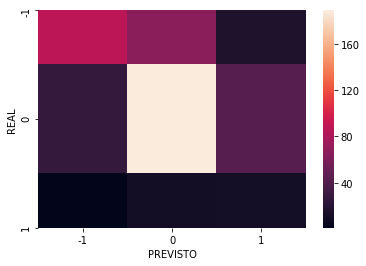

              precision    recall  f1-score   support

    NEGATIVO       0.76      0.52      0.62       170
      NEUTRO       0.71      0.73      0.72       259
    POSITIVO       0.16      0.50      0.24        22

    accuracy                           0.64       451
   macro avg       0.54      0.58      0.53       451
weighted avg       0.70      0.64      0.66       451



In [382]:
#rodando novamente
altera_dicionario()
analisa_sentimento()
calcula_acuracia()

In [388]:
#aplicar stemming
def aplica_stemming():
    global palavras_negativas
    global palavras_positivas
    global palavras_neutras
    nltk.download('rslp')
    stemmer = RSLPStemmer()

    #aplicando os mesmos tratamentos nas palavras
    palavras_negativas = [stemmer.stem(palavra) for palavra in palavras_negativas]
    palavras_positivas = [stemmer.stem(palavra) for palavra in palavras_positivas]
    palavras_neutras = [stemmer.stem(palavra) for palavra in palavras_neutras]
    #aplicando o stteming no texto tratado
    df["text_tratado"] = df['text_tratado'].apply(lambda x: [stemmer.stem(y) for y in x])

[nltk_data] Downloading package rslp to /Users/lups/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


PREVISTO  -1   0    1
REAL                 
-1        76  54  40 
 0        61  94  104
 1        3   5   14 


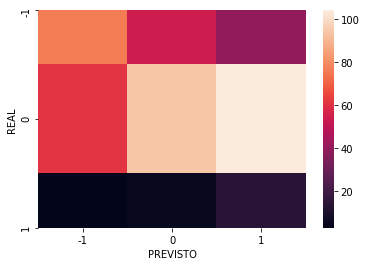

              precision    recall  f1-score   support

    NEGATIVO       0.54      0.45      0.49       170
      NEUTRO       0.61      0.36      0.46       259
    POSITIVO       0.09      0.64      0.16        22

    accuracy                           0.41       451
   macro avg       0.42      0.48      0.37       451
weighted avg       0.56      0.41      0.45       451



In [389]:
#rodando novamente
aplica_stemming()
analisa_sentimento()
calcula_acuracia()

### Nova análise - alteração na forma de analise do sentimento. 
O tweet por natureza são curtos, com isso não há margem para uma contextualização.
Com isso o calculo do sentimento foi alterado para que ao econtrar uma palavra negativa considera negativa.
Se encontrar uma palavra positiva já considera como positiva. 
Os testes serão repetidos com esta nova abordagem.

In [391]:
#função que conta sentimentos

def sentiment(words, pos_list, neg_list):
    sent = 0

    for word in words:
        if word in neg_list:
            sent = -1
            break
        elif word in pos_list:
            sent = 1
            break
    
    return sent

In [393]:
#carregando os tweets novamente
df = pd.read_pickle('dados_twitter_ans_classificados_tratados.pkl')
palavras_negativas = []
palavras_positivas = []
palavras_neutras = []

PREVISTO  -1    0   1
REAL                 
-1        65  83   22
 0        20  194  45
 1        2   10   10


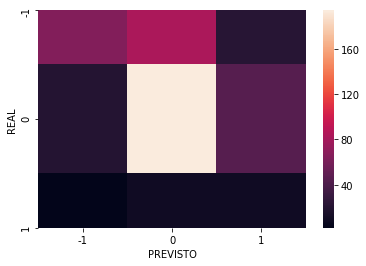

              precision    recall  f1-score   support

    NEGATIVO       0.75      0.38      0.51       170
      NEUTRO       0.68      0.75      0.71       259
    POSITIVO       0.13      0.45      0.20        22

    accuracy                           0.60       451
   macro avg       0.52      0.53      0.47       451
weighted avg       0.68      0.60      0.61       451



In [394]:
carrega_dicionario()
analisa_sentimento()
calcula_acuracia()

PREVISTO  -1    0   1
REAL                 
-1        94  55   21
 0        28  188  43
 1        1   9    12


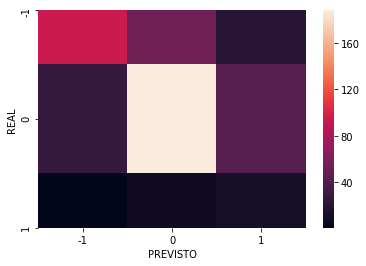

              precision    recall  f1-score   support

    NEGATIVO       0.76      0.55      0.64       170
      NEUTRO       0.75      0.73      0.74       259
    POSITIVO       0.16      0.55      0.24        22

    accuracy                           0.65       451
   macro avg       0.56      0.61      0.54       451
weighted avg       0.72      0.65      0.68       451



In [395]:
altera_dicionario()
analisa_sentimento()
calcula_acuracia()

[nltk_data] Downloading package rslp to /Users/lups/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


PREVISTO   -1   0   1
REAL                 
-1        114  14  42
 0        111  67  81
 1        7    3   12


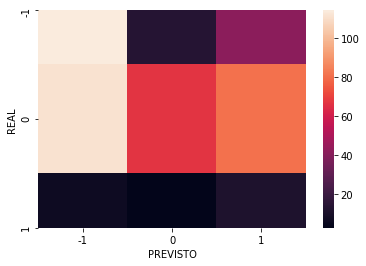

              precision    recall  f1-score   support

    NEGATIVO       0.49      0.67      0.57       170
      NEUTRO       0.80      0.26      0.39       259
    POSITIVO       0.09      0.55      0.15        22

    accuracy                           0.43       451
   macro avg       0.46      0.49      0.37       451
weighted avg       0.65      0.43      0.45       451



In [396]:
#rodando novamente
aplica_stemming()
analisa_sentimento()
calcula_acuracia()

### Análise concluída
Pela comparação o melhor resultado o sentimento com palara única com a alteração no dicionário sem o stemming.
Será executado novamente para finalizar.

In [397]:
### Terminada a análise!
df.to_pickle('dados_twitter_ans_classificados_analisados.pkl')